In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df=pd.read_csv('USA_Housing.csv')

In [3]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [5]:
df.shape

(5000, 7)

In [6]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [7]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [9]:
df.corr()

/tmp/ipykernel_58185/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


/tmp/ipykernel_58185/1950383679.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

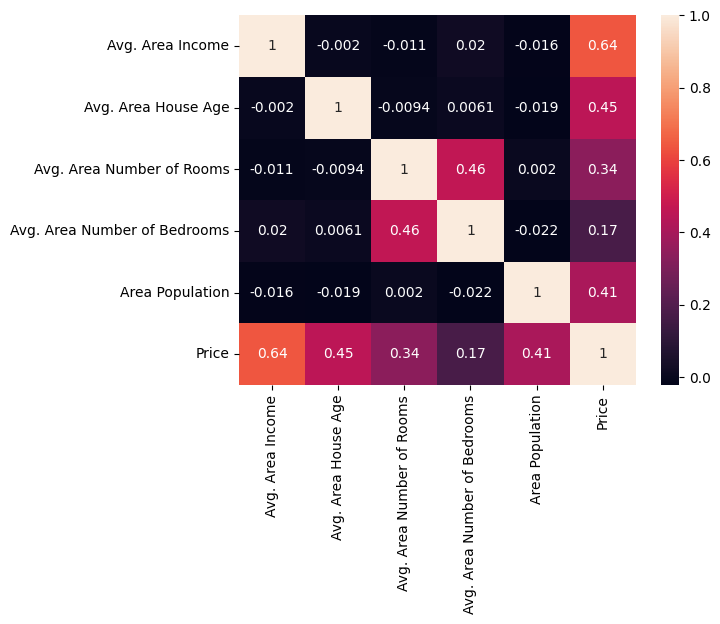

In [10]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [11]:
df.drop('Address',axis='columns',inplace=True)

In [12]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [13]:
X=df.drop('Price',axis='columns')
y=df.Price

In [24]:
from sklearn.model_selection import train_test_split as tts

In [25]:
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.1,random_state=10)

In [26]:
X_train

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1731,69227.607255,3.858766,9.114773,6.02,42582.625871
3096,47121.009958,6.714882,6.650923,3.23,46303.462107
1464,79863.285936,6.697264,6.376060,3.05,35048.263338
470,85719.315623,4.537668,6.029204,3.19,32058.356241
454,72432.700339,5.877127,5.761670,3.20,35039.469390
...,...,...,...,...,...
1180,72695.115137,5.363777,6.871980,4.24,48115.420780
3441,75479.767453,6.009215,6.475022,4.26,18537.430799
1344,70670.878894,6.581627,6.477495,3.17,23592.157588
4623,73804.908618,6.731999,7.617261,4.25,40877.189120


In [27]:
y_test

245     1.118048e+06
4493    1.326947e+06
4583    1.053485e+06
2242    7.590447e+05
3407    1.381118e+06
            ...     
4897    1.169265e+06
835     1.538923e+06
2713    1.228880e+06
4056    1.116680e+06
192     1.203248e+06
Name: Price, Length: 500, dtype: float64

In [28]:
from sklearn import linear_model

In [29]:
model=linear_model.LinearRegression()

In [30]:
model.fit(X_train,y_train)

LinearRegression()

In [31]:
model.predict(X_test)

array([1195355.48986965, 1185598.14832844, 1046410.08178059,
        828162.86840965, 1484255.39547072,  542462.06591951,
       2473741.73992134, 1447999.981508  , 1321906.98744556,
       1136575.24554695, 1372355.52912891, 1719361.30512347,
       1372092.61584221,  521574.97539476, 1411630.74125014,
       1075168.89299706,  959279.88555321, 1124764.7314722 ,
       1281572.88043427, 1008797.97541985,  788659.86656033,
       1071570.55816932, 1284284.19599936, 1054341.32062038,
       1248013.86245374, 1447121.43416387,  377120.75774285,
       1275337.28253902, 1204678.7209452 , 1499687.69761606,
       1634818.82036249, 1577432.4574992 , 1492733.12595494,
        380880.5163198 , 1812779.02954605, 1215014.00891082,
       1556128.96038496, 1070974.94314152, 1229938.27886367,
       1075852.20493876, 1004822.8635635 , 1787569.79505877,
       1035726.07027516, 1435458.212222  ,  834457.74565536,
        888499.3439794 , 1134320.43473912,  904860.25045583,
       1315182.35514778,

In [39]:
str=str(model.score(X_test,y_test)*100)+'%'

TypeError: 'str' object is not callable

In [40]:
print(f'The model is {str} accurate.')

The model is 91.97421958339257% accurate.
